In [24]:
# from https://data36.com/plot-histogram-python-pandas/
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import csv
import subprocess

ctf_file = "alloc_many_large/alloc_many_large.ctf"


In [25]:
# run the dump command, store results in temporary file, return name of temporary file
# an alternative would be to read the .ctf directly in python, but according to 
# https://babeltrace.org/docs/v2.0/python/bt2/ the python API is undocumented (although 
# probably not too hard to figure out if this approach is deemed too ugly)
def convert_ctf_to_dump(filename):
    outfile_s = "tmp.ctf.dump"
    with open(outfile_s, "w") as outfile:
        subprocess.run(["bin/dump.exe","ctf",ctf_file],check=True,stdout=outfile)
    return outfile_s

ctf_dump_file = convert_ctf_to_dump(ctf_file)

In [26]:
# now we can read the file as plain csv

# maintain a dict, mapping allocation size to number of allocs
allocs = dict()

# and a simple list of alloc sizes
xs = []

with open(ctf_dump_file) as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        #print(', '.join(row))
        entry_type = row[0]
        if (entry_type == 'a' or entry_type == 'A'):
            sz = int(row[2])
            xs.append(int(sz))
            if sz in allocs:
                allocs[sz] = allocs[sz]+1
            else:
                allocs[sz] = 1

#print(allocs)
#print(xs)

In [27]:
ys = np.array(list(allocs.items()))
ys

array([[   258, 100001],
       [     2, 100001]])

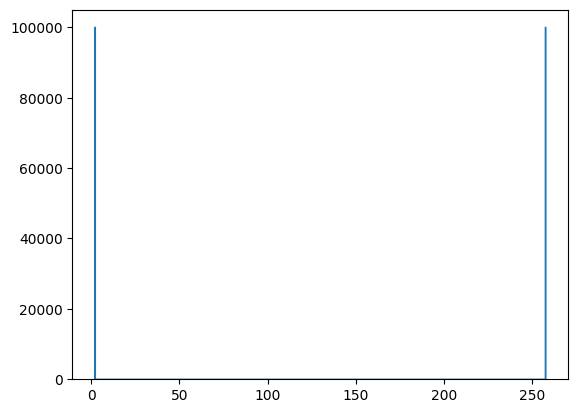

In [28]:
x = xs
counts, bins = np.histogram(x,1000)
plt.stairs(counts,bins)

In [29]:
counts

array([100001,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [30]:
bins

array([  2.   ,   2.256,   2.512, ..., 257.488, 257.744, 258.   ])

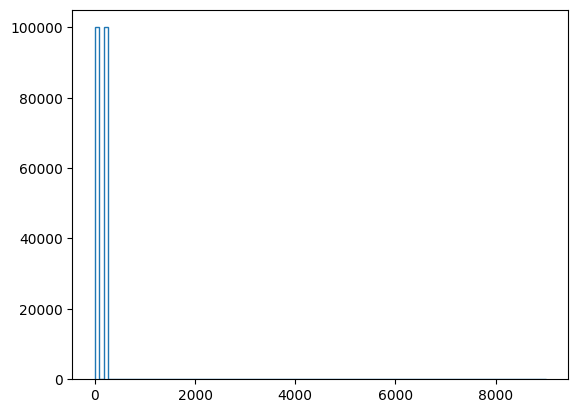

In [31]:
x=xs
counts, bins = np.histogram(x,range=(0,9000),bins=100)
plt.stairs(counts,bins)

In [32]:
# sum allocs.items; split into "small" vs "large" allocs
def compute_ratio_small_large(max_small_sz,allocs_grouped_by_size):
    allocs = allocs_grouped_by_size
    def is_small(sz): return sz <= max_small_sz
    total_small_allocs = sum([ v for (k,v) in allocs.items() if is_small(k) ])
    total_large_allocs = sum([ v for (k,v) in allocs.items() if not is_small(k) ])
    percentage_large = 100.0 * total_large_allocs / (total_small_allocs+total_large_allocs)
    total = total_small_allocs+total_large_allocs
    return { "total_small_allocs":total_small_allocs,
            "total_large_allocs": total_large_allocs,
            "total":total,
           "percentage_large": percentage_large}

x = compute_ratio_small_large(127,allocs)

print("Percentage large allocs of total: ", x["percentage_large"] , "(total is "+str(x["total"])+")")

# for max_small_sz = 127: Percentage large allocs of total:  11.271880303849427 (total is 689947)

Percentage large allocs of total:  50.0 (total is 200002)
